In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import wilcoxon
from textwrap import wrap

In [123]:
PERFORMANCE_PATH = Path('/gpfs1/scratch/90days/s4436005/img_reg/train_dataset_10x_20_03_20_strict_iternorm/performance_metrics.csv')
OUTPUT_PATH = Path('/gpfs1/scratch/90days/s4436005/img_reg/train_dataset_10x_20_03_20_strict_iternorm/')

In [5]:
metrics_df = pd.read_csv(PERFORMANCE_PATH)

In [7]:
metrics_df

,Unnamed: 0,TP53_Slide_Name,H&E_Slide_Name,Template_Slide_Name,Initial_Mutual_Info,Affine_Mutual_Info,Final_Mutual_Info,Cancer_Tiles,Uncertain_Tiles,Non_Cancer_Tiles
0,0,1820_N_10545A_4_TP53.svs,1820_N_10545A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.228616,0.360202,0.372850,0.0,380.0,2859.0
1,1,1820_T_105452F_4_TP53.svs,1820_T_105452F_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.147189,0.310710,0.375829,363.0,950.0,1080.0
2,2,2065_N_12752A_4_TP53.svs,2065_N_12752A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.111324,0.159081,0.208874,0.0,891.0,537.0
3,3,2065_T_12756A_4_TP53.svs,2065_T_12756A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.188082,0.365470,0.400068,1234.0,531.0,1625.0
4,4,2112_N_12341B_4_TP53.svs,2112_N_12341B_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.090476,0.321550,0.336954,0.0,162.0,1740.0
5,5,2112_T_12335F_4_TP53.svs,2112_T_12335F_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.174017,0.207803,0.271325,951.0,1368.0,2061.0
6,6,2148_N_11397A_4_TP53.svs,2148_N_11397A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.051108,0.178023,0.201674,0.0,1137.0,1269.0
7,7,2148_T_11393A_4_TP53.svs,2148_T_11393A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.120274,0.185971,0.223203,984.0,1349.0,1851.0
8,8,2171_N_11521A_4_TP53.svs,2171_N_11521A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.115691,0.203831,0.220502,0.0,1005.0,848.0
9,9,2171_T_11524A_4_TP53.svs,2171_T_11524A_2_HandE.svs,2171_T_11524A_2_HandE.svs,0.184471,0.280592,0.372509,1171.0,1561.0,2304.0


In [24]:
mi_metrics_df = metrics_df[['Initial_Mutual_Info', 'Affine_Mutual_Info', 'Final_Mutual_Info']]

Text(1.0, 0.4600683775391337, 'p=0.005')

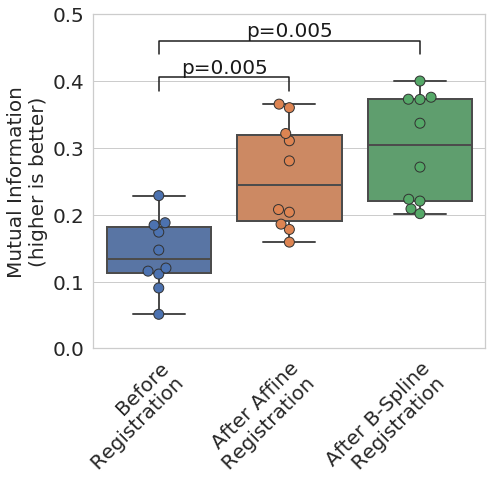

In [133]:
y_label = "Mutual Information (higher is better)"

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(x='variable', y='value', data=pd.melt(mi_metrics_df), linewidth = 2)
sns.swarmplot(x='variable', y='value', data=pd.melt(mi_metrics_df), edgecolor = "0.2", linewidth=1, size = 10)
ax.tick_params(labelsize = 20)
ax.set_ylabel('\n'.join(wrap(y_label, 20)), fontsize = 20)
ax.set_xlabel("")
ax.set_xticklabels(["Before\n Registration","After Affine\n Registration","After B-Spline\n Registration"])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.ylim(0, 0.5)
#plt.title("Registration Performance", fontsize = 30)
fig.tight_layout()

#Add significance annotations
x1, x2 = 0, 1   #first two columns
y1, h1, col = mi_metrics_df['Affine_Mutual_Info'].max() + 0.02, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
p_affine = wilcoxon(mi_metrics_df['Initial_Mutual_Info'], mi_metrics_df['Affine_Mutual_Info'])
plt.text((x1+x2)*0.5, y1+h1, "p={0}".format(round(p_affine.pvalue, 3)), ha='center', va='bottom', color = col, fontsize = 20)

x3, x4 = 0, 2    #first and third columns
y2, h2, col = mi_metrics_df['Final_Mutual_Info'].max() + 0.04, 0.02, 'k'
plt.plot([x3, x3, x4, x4], [y2, y2+h2, y2+h2, y2], lw=1.5, c=col)
p_final = wilcoxon(mi_metrics_df['Affine_Mutual_Info'], mi_metrics_df['Final_Mutual_Info'])
plt.text((x3+x4)*0.5, y2+h2, "p={0}".format(round(p_final.pvalue, 3)), ha='center', va='bottom', color = col, fontsize = 20)

In [134]:
fig.savefig(OUTPUT_PATH.joinpath('registration_performance.png'), dpi=300, transparent = True)